In [1]:
from pathlib import Path

# filepath
dummies_dir_path = Path().resolve().parent.joinpath("dummies")
dummy_pdf_path = dummies_dir_path.joinpath("dummy.pdf")

# PyMuPDF

## PDFデータを読み込む
- PyMuPDFでは、`fitz`をimportし、`open()`関数によってPDFを読み込む

In [2]:
import fitz

with fitz.open(dummy_pdf_path) as pdf_in:
    # type
    print(f"fitz.Document Object: {type(pdf_in)}")
    # get PDF metadata (ex. title, author, ...)
    pdf_title, pdf_author = pdf_in.metadata["title"], pdf_in.metadata["author"]
    print(f"Title: {pdf_title}, Author: {pdf_author}")

fitz.Document Object: <class 'fitz.fitz.Document'>
Title: Dummy Wakate 54, Author: nersonu


## ページ単位の処理
- ページ単位で処理する際は、`Document.pages()`もしくはそのままDocumentオブジェクトをforで取り出すと、ページ単位のオブジェクトが返るgeneratorが使える

In [3]:
with fitz.open(dummy_pdf_path) as pdf_in:
    # the number of PDF pages
    print(f"Number of pages: {pdf_in.page_count}")
    for page in pdf_in:
        print(f"fitz.Page Object: {type(page)}")
        print(f"Page no. {page.number}")

Number of pages: 2
fitz.Page Object: <class 'fitz.fitz.Page'>
Page no. 0
fitz.Page Object: <class 'fitz.fitz.Page'>
Page no. 1


## ページに含まれるテキスト情報の抽出

In [4]:
with fitz.open(dummy_pdf_path) as pdf_in:
    for page in pdf_in:
        print(page.get_text())
        break

令和 3 年 9 月 26 日 
情報科学若手の会の皆様 
 
そこら辺にいる研究員 
nersonu 
 
第 54 回情報科学若手の会ダミーデータ 
 風に揺れるすすきに風情を感じる爽秋の候、皆様におかれましては、ますますご活躍のこ
とと拝察しております。平素より格別のご愛願を賜り、御礼申し上げます。 
 さて、本日は本 PDF ダミーデータを用いまして、Python を用いた PDF データからの情
報抽出デモを行いたいと考えております。ぜひ御覧ください。 
 
 
1. 箇条書き 
箇条書きのテスト 
 
2. 画像情報 
画像情報のテスト 
 
 
3. 表情報 
表情報のテスト 
 
メートル・グラム 
ヤード・ポンド 
尺・匁 
長さ 
1 
1.0936 
3.3 
重さ 
1 
0.0022 
0.2667 
 
 
 



## ページ単位で画像化してmatplotlibで表示する

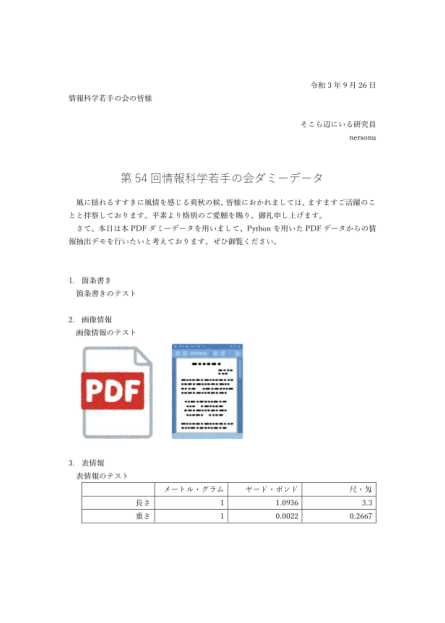

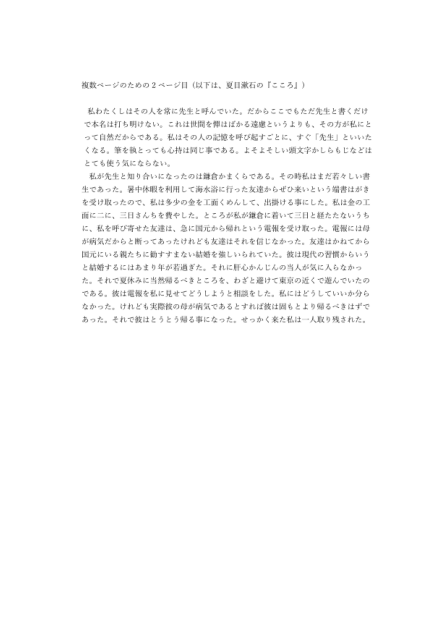

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

with fitz.open(dummy_pdf_path) as pdf_in:
    for page in pdf_in:
        # get pixmap
        pix = page.get_pixmap(alpha=False)
        # covert fitz.Pixmap to Pillow's Image object
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        
        # show image
        plt.figure(figsize=(8, 11.2)) # A4: 1:1.41
        plt.axis("off") # grid option: off
        plt.imshow(img)
        plt.show()

## ページ内画像情報の抽出

{'number': 27, 'bbox': (95.55000305175781, 466.25, 211.0, 600.22998046875), 'transform': (115.44999694824219, 0.0, -0.0, 133.97999572753906, 95.55000305175781, 466.25), 'width': 307, 'height': 357, 'colorspace': 3, 'cs-name': 'DeviceRGB', 'xres': 96, 'yres': 96, 'bpc': 8, 'size': 13151}


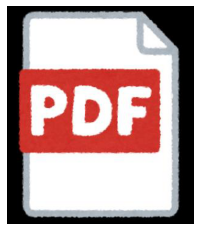

{'number': 28, 'bbox': (211.0, 462.25, 344.1499938964844, 600.22998046875), 'transform': (133.14999389648438, 0.0, -0.0, 137.97999572753906, 211.0, 462.25), 'width': 355, 'height': 367, 'colorspace': 3, 'cs-name': 'DeviceRGB', 'xres': 96, 'yres': 96, 'bpc': 8, 'size': 20201}


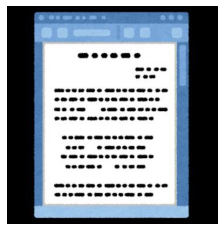

In [6]:
from io import BytesIO

with fitz.open(dummy_pdf_path) as pdf_in:
    for page in pdf_in:
        for image_info in page.get_image_info():
            print(image_info)
            block_number = image_info["number"]
            # binary data of image
            image_binary = page.get_text("dict")["blocks"][block_number]["image"]
            img = Image.open(BytesIO(image_binary))
            # show image
            plt.axis("off") # grid option: off
            plt.imshow(img)
            plt.show()

## block単位でPDFデータを抽出する

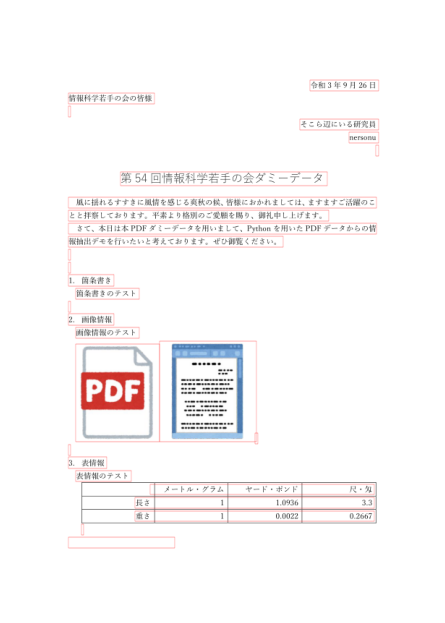

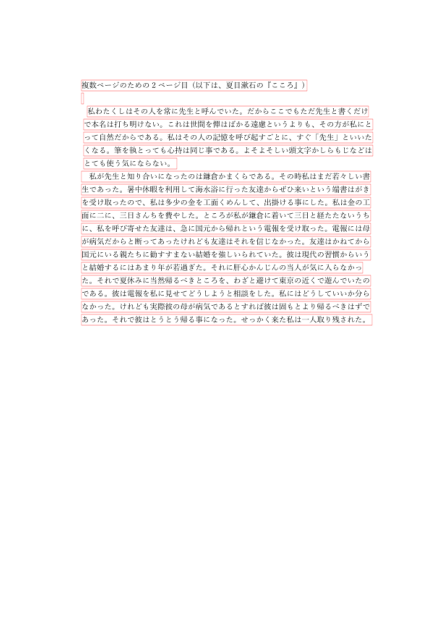

In [7]:
with fitz.open(dummy_pdf_path) as pdf_in:
    for page in pdf_in:
        for block in page.get_text("dict")["blocks"]:
            rect = fitz.Rect(block["bbox"]).round()
            shape = page.new_shape()
            shape.draw_rect(rect)
            shape.finish(width=0.3, color=(1, 0, 0))
            shape.commit()
            
        # get pixmap
        pix = page.get_pixmap(alpha=False)
        # covert fitz.Pixmap to Pillow's Image object
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        # show image
        plt.figure(figsize=(8, 11.2)) # A4: 1:1.41
        plt.axis("off") # grid option: off
        plt.imshow(img)
        plt.show()

In [8]:
with fitz.open(dummy_pdf_path) as pdf_in:
    for page in pdf_in:
        for block in page.get_text("dict")["blocks"]:
            print(block)
            break
        break

{'number': 0, 'type': 0, 'bbox': (419.42999267578125, 101.581298828125, 513.20751953125, 115.095947265625), 'lines': [{'spans': [{'size': 10.5, 'flags': 4, 'font': 'YuMincho-Regular', 'color': 0, 'ascender': 0.9951171875, 'descender': -0.2919921875, 'text': '令和 3 年 9 月 26 日 ', 'origin': (419.42999267578125, 112.030029296875), 'bbox': (419.42999267578125, 101.581298828125, 513.20751953125, 115.095947265625)}], 'wmode': 0, 'dir': (1.0, 0.0), 'bbox': (419.42999267578125, 101.581298828125, 513.20751953125, 115.095947265625)}]}


# Camelot

## 表を検出して可視化する
- カラーマップのRGBの順序の関係で、赤と青の値が入れ替わっているが気にしないことにする

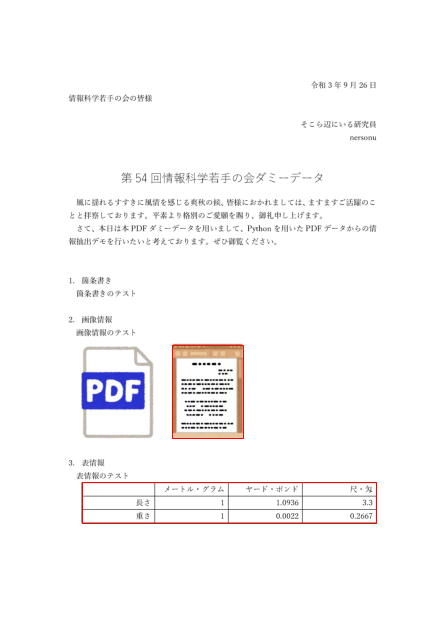

In [9]:
import camelot

# easy
tables = camelot.read_pdf(str(dummy_pdf_path))

fig = camelot.plot(tables[0], kind="contour")
fig.set_size_inches((8, 11.2))
plt.axis("off")
fig.show()

## DataFrameとして表を抽出する

In [10]:
tables = camelot.read_pdf(str(dummy_pdf_path))

df = tables[1].df
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
0,,メートル・グラム,ヤード・ポンド,尺・匁
1,長さ,1,1.0936,3.3
2,重さ,1,0.0022,0.2667
